In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/aviralb13/git-codes/main/datas/lung%20cancer.csv")

In [24]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [25]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [26]:
label = preprocessing.LabelEncoder()
df["LUNG_CANCER"] = label.fit_transform(df["LUNG_CANCER"])

In [27]:
df # LungCanccer 1 = yes , 0 = no 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [28]:
df["GENDER"] = label.fit_transform(df["GENDER"])

In [29]:
df # 1 = Male, 0 = Female

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [30]:
mut_X = df[["AGE", "SMOKING"]]
mut_Y = df["LUNG_CANCER"]

mutual_info = mutual_info_classif(mut_X,mut_Y)
print(mutual_info)

[0.01378178 0.0071658 ]


In [31]:
features = df.columns.tolist()

In [32]:
features = features[:-1]

In [33]:
features

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

In [34]:
x = df[features] # data

In [35]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [36]:
y = df["LUNG_CANCER"]

In [37]:
y # label 

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(x,y)

In [39]:
## MODEL 1 
SVC = LinearSVC()
SVC.fit(train_X,train_Y)

/Users/engindogru/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [40]:
prediction = SVC.predict(test_X)
accuracy_score(test_Y,prediction)

0.8461538461538461

In [41]:
f1_score(test_Y,prediction)

0.9166666666666667

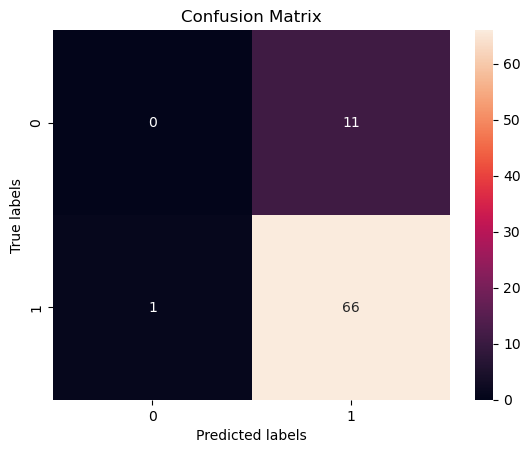

In [42]:
   
cm = confusion_matrix(test_Y, prediction)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


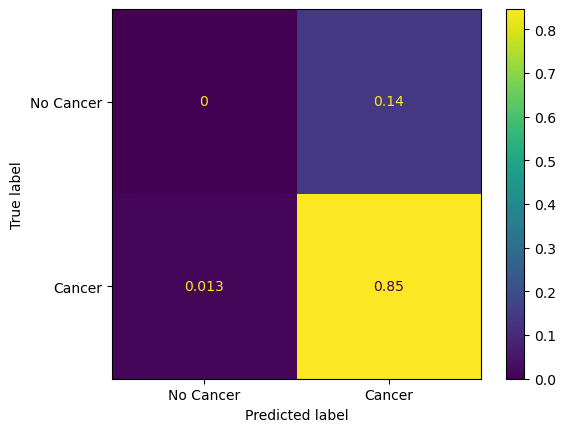

In [43]:
cm = confusion_matrix(test_Y, prediction, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Cancer','Cancer'])
cmd.plot()

In [44]:
print(classification_report(test_Y,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.99      0.92        67

    accuracy                           0.85        78
   macro avg       0.43      0.49      0.46        78
weighted avg       0.74      0.85      0.79        78



In [47]:
## MODEL 2 

RanFor = RandomForestClassifier()
RanFor.fit(train_X,train_Y)

RandomForestClassifier()

In [50]:
prediction_RF = RanFor.predict(test_X)
accuracyRF = accuracy_score(test_Y,prediction_RF)
print(accuracyRF)

0.9230769230769231


In [51]:
print(classification_report(test_Y,prediction_RF))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.93      0.99      0.96        67

    accuracy                           0.92        78
   macro avg       0.89      0.77      0.81        78
weighted avg       0.92      0.92      0.92        78



In [61]:
## MODEL 3 

KNN = neighbors.KNeighborsClassifier(15, weights="distance")
KNN.fit(train_X, train_Y)

prediction_KNN = KNN.predict(test_X)
accuracy_KNN = accuracy_score(test_Y,prediction_KNN)
print(accuracy_KNN)

0.8717948717948718
